In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.portfolio_selection_ga import PortfolioSelectionGA
from src.portfolio_selection_gurobi import PortfolioSelectionGurobi

In [2]:
def read_returns_data(file_path):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    return data.set_index('Date').sort_index().pct_change().dropna()

data = read_returns_data("../data/base_dados.xlsx")

In [3]:
risk_aver_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

gurobi_returns = []
gurobi_risks = []
ga_returns = []
ga_risks = []

for risk_aver in risk_aver_list:
  print(f"Risk Aversion: {risk_aver}", end="\r")
  ########################GUROBI############################
  gurobi = PortfolioSelectionGurobi(data=data, risk_aver=risk_aver)
  g_s = gurobi.optimize()
  gurobi_returns.append(100*g_s @ data.mean())
  gurobi_risks.append(100*np.sqrt(g_s @ data.cov() @ g_s))
  ########################GENETIC ALGORITHM#################
  ga = PortfolioSelectionGA(data=data, risk_aver=risk_aver)
  ga_s = ga.optimize()
  ga_returns.append(100*ga_s @ data.mean())
  ga_risks.append(100*np.sqrt(ga_s @ data.cov() @ ga_s))

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-07


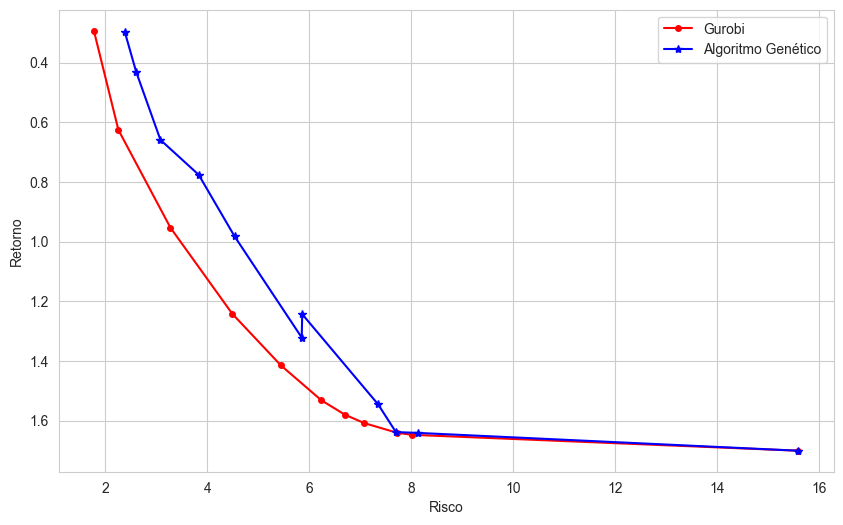

In [4]:
import seaborn as sns 
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(gurobi_risks, gurobi_returns, label='Gurobi', marker='o', color="red", markersize=4)
plt.plot(ga_risks, ga_returns, label='Algoritmo Genético', marker='*', color="blue")
plt.xlabel("Risco")
plt.ylabel("Retorno")
plt.gca().invert_yaxis()
plt.legend()
plt.savefig("../images/gurobi_vs_ga.png")